# PROYECTO FINAL: ANÁLISIS DE ARTISTAS EN SPOTIFY Y YOUTUBE

# Descripción de Columnas del Dataset

| Columna             | Descripción |
|---------------------|-------------|
| **Artist**         | Nombre del artista o banda que interpreta la canción. |
| **Url_spotify**    | URL de la canción en Spotify. |
| **Track**          | Nombre de la canción. |
| **Album**          | Nombre del álbum en el que se encuentra la canción. |
| **Album_type**     | Tipo de álbum (por ejemplo, "album", "single", "compilation"). |
| **Uri**            | URI de Spotify que identifica de manera única la canción. |
| **Danceability**   | Medida (de 0 a 1) que indica qué tan bailable es la canción, basada en ritmo, estabilidad del tempo y beat. |
| **Energy**        | Medida (de 0 a 1) que representa la intensidad y actividad de la canción (valores altos corresponden a canciones más dinámicas). |
| **Key**           | Tono musical de la canción representado en un número entero (0 = Do, 1 = Do#, ..., 11 = Si). |
| **Loudness**      | Nivel de volumen de la canción en decibelios (dB). |
| **Speechiness**   | Medida (de 0 a 1) que indica la cantidad de palabras habladas en la canción (valores altos indican que es más una grabación hablada que cantada). |
| **Acousticness**  | Medida (de 0 a 1) que evalúa la probabilidad de que la canción sea acústica (valores altos indican mayor presencia de instrumentos acústicos). |
| **Instrumentalness** | Medida (de 0 a 1) que indica la presencia de voces en la canción (valores altos indican menor presencia vocal). |
| **Liveness**      | Medida (de 0 a 1) que estima si la canción fue grabada en vivo (valores altos sugieren una grabación en directo). |
| **Valence**       | Medida (de 0 a 1) que describe la positividad musical de la canción (valores altos corresponden a canciones más alegres). |
| **Tempo**        | Velocidad de la canción en beats per minute (BPM). |
| **Duration_ms**  | Duración de la canción en milisegundos. |
| **Url_youtube**  | URL de la canción en YouTube. |
| **Title**        | Título de la canción en YouTube. |
| **Channel**      | Nombre del canal de YouTube donde está publicada la canción. |
| **Views**        | Número de visualizaciones de la canción en YouTube. |
| **Likes**        | Número de "me gusta" en YouTube. |
| **Comments**     | Número de comentarios en YouTube. |
| **Description**  | Descripción proporcionada en el video de YouTube. |
| **Licensed**     | Indica si el contenido en YouTube está licenciado oficialmente (True/False). |
| **official_video** | Indica si el video en YouTube es el video oficial del artista (True/False). |
| **Stream**       | Número total de reproducciones de la canción en plataformas de streaming. |

## Ejercicio 1: Limpieza de Datos

Identifica las columnas con valores nulos y sigue estas reglas:

* Si una columna tiene más del 3% de valores nulos, elimínala.
* Para columnas numéricas con valores nulos, reemplázalos por la mediana.
* Para columnas categóricas con valores nulos, reemplázalos por el valor más frecuente.
* Cambia los tipos de datos de las siguientes columnas:
* Convierte "Key" y "Tempo" a tipo entero.
* Convierte "Views", "Likes", "Comments", y "Stream" a tipo flotante.
* Guarda el dataset limpio en una variable llamada data_cleaned.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("../datasets/Spotify_Youtube.csv", index_col=0)

print("Nuestro dataset tiene este numero de registos y columnas:")
print(data.shape)


Nuestro dataset tiene este numero de registos y columnas:
(20718, 27)


In [87]:
#Ejercicio 1 
#Eliminar una columna si tiene mas del 3% de valores nulos
#Obtenemos el numero total de los nulos 
nulos = data.isnull().sum()
print(f'Estos son los valores nulos de todas las columna:\n{nulos}\n\n')

#Ahora calculamos el porcentaje de los nulos y eliminamos los que tienen mas del 3 % de nulos 
porcentaje_nulos = nulos /len (data)
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 0.03].index
print ('Estas son las columnas con mas de 3% de nulos ' ,list(columnas_a_eliminar))

#Procedemos a borrar las columnas que tienen mas del 3% de nulos 
data_cleaned = data.drop(columns=columnas_a_eliminar)


#Para columnas numéricas con valores nulos, reemplázalos por la mediana.

# Rellenar nulos en columnas numéricas con la mediana
# Se hace con un bucle for que recorre las coluimas categoricas
# Revisa los nulos y los sustituye por la media 
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if data_cleaned[col].isnull().sum() > 0:
        data_cleaned[col].fillna(data_cleaned[col].median())

#Para columnas categóricas con valores nulos, reemplázalos por el valor más frecuente.

# Rellenar nulos en columnas categóricas con la moda
# Se hace con un bucle for que recorre las coluimas categoricas
# Revisa los nulos y los sustituye por la moda ,[0] toma el valor mas frecuente
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data_cleaned[col].isnull().sum() > 0:
        data_cleaned[col].fillna(data_cleaned[col].mode()[0])



#Cambia los tipos de datos de las siguientes columnas:
#Convierte "Key" y "Tempo" a tipo entero con la funcion astype
if 'Key' in data_cleaned.columns:
    data_cleaned['Key'] = data_cleaned['Key'].astype('int', errors='ignore')

if 'Tempo' in data_cleaned.columns:
    data_cleaned['Tempo'] = data_cleaned['Tempo'].astype('int', errors='ignore')

#Convierte "Views", "Likes", "Comments", y "Stream" a tipo flotante. con la funcion astype 
#Se recorre la las columnas con un bucle for.
float_columns = ['Views', 'Likes', 'Comments', 'Stream']
for col in float_columns:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].astype('float', errors='ignore')



# Mostrar un resumen del dataframe limpio
print("\nAqui tenemos todas las columnas con el tipo de datos cambiados")
data_cleaned.dtypes


Estos son los valores nulos de todas las columna:
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


Estas son las columnas con mas de 3% de nulos  ['Description']

Aqui tenemos todas las columnas con el tipo de datos cambiados


Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
official_video       object
Stream              float64
dtype: object

## Ejercicio 2: Análisis Descriptivo del dataset Limpio

Utilizando data_cleaned, calcula las siguientes estadísticas descriptivas para las columnas "Views", "Likes", "Comments", y "Stream":

* Media, mediana, desviación estándar, mínimo, y máximo.
* Guarda estas estadísticas en un dataFrame llamado descriptive_stats.
* Filtra todas las canciones con más de 500 millones de visualizaciones ("Views") y guarda este subconjunto en top_youtube.

In [95]:
#Utilizando data_cleaned, calcula las siguientes estadísticas descriptivas para las columnas "Views", "Likes", "Comments", y "Stream":
#Media, mediana, desviación estándar, mínimo, y máximo

# Creamos una variable 'estadisticas' seleccionando columnas específicas del DataFrame 'data_cleaned'
estadisticas = data_cleaned[["Views", "Likes", "Comments", "Stream"]]
print("Estas son todas las estadisticas de nuestro dataframe")
print(estadisticas.head())
print("pero nosotros solo queremos obtener la media, mediana, desviación estándar, mínimo, y máximo.")

# Se calculan las estadísticas individualmente
media = estadisticas.mean()
mediana = estadisticas.median()
desviacion = estadisticas.std()
minimo = estadisticas.min()
maximo = estadisticas.max()


# Se crea el Dataframe
descriptive_stats = pd.DataFrame({
    "Media": media,
    "Mediana": mediana,
    "Desviación estándar": desviacion,
    "Mínimo": minimo,
    "Máximo": maximo
})

# Mostrar resultado
print(f"\n\nEste es nuestro dataframe obtenido\n",descriptive_stats)

#Filtra todas las canciones con más de 500 millones de visualizaciones ("Views") y guarda este subconjunto en top_youtube.
top_youtube = data_cleaned[data_cleaned["Views"] > 500_000_000]
print(f"\nEstas es el numero de canciones con mas de 500 millones de visualizaciones \n {top_youtube.size}")

Estas son todas las estadisticas de nuestro dataframe
         Views      Likes  Comments        Stream
0  693555221.0  6220896.0  169907.0  1.040235e+09
1   72011645.0  1079128.0   31003.0  3.100837e+08
2    8435055.0   282142.0    7399.0  6.306347e+07
3  211754952.0  1788577.0   55229.0  4.346636e+08
4  618480958.0  6197318.0  155930.0  6.172597e+08
pero nosotros solo queremos obtener la media, mediana, desviación estándar, mínimo, y máximo.


Este es nuestro dataframe obtenido
                  Media     Mediana  Desviación estándar  Mínimo        Máximo
Views     9.393782e+07  14501095.0         2.746443e+08     0.0  8.079649e+09
Likes     6.633411e+05    124481.0         1.789324e+06     0.0  5.078865e+07
Comments  2.751899e+04      3277.0         1.932347e+05     0.0  1.608314e+07
Stream    1.359422e+08  49682981.5         2.441321e+08  6574.0  3.386520e+09

Estas es el numero de canciones con mas de 500 millones de visualizaciones 
 21710


## Ejercicio 3: Creación de Nuevas Columnas y Análisis por Grupo

**Utiliza el dataFrame top_youtube.** 

* Crea una nueva columna llamada "Likes_to_Views" que represente la proporción de "Likes" respecto a "Views", con dos decimales.
* Agrupa las canciones de top_youtube por "Album_type" y calcula:
* Promedio y mediana de "Energy" y "Danceability".
* Total de "Views" y "Stream" por tipo de álbum.
* Guarda el resultado de la agrupación en un nuevo dataFrame llamado album_analysis.

In [132]:
# Crea una nueva columna llamada "Likes_to_Views" que represente la proporción de "Likes" respecto a "Views", con dos decimales.

#Creamos una columna nueva , que es el resultado de dividir la columa "Likes" con respecto a "Views"
data_cleaned["Likes_to_Views"] = (data_cleaned["Likes"] / data_cleaned["Views"]).round(2)

# Agrupa las canciones de top_youtube por "Album_type" y calcula:
agrupado_album = top_youtube.groupby("Album_type").size()
print('Estas son las canciones por tipo de album')
print(agrupado_album)


# Promedio y media de "Energy" y "Danceability".
# Calculamos el promedio (media aritmética) de estas dos variables agrupadas por tipo de álbum.
promedio = top_youtube.groupby("Album_type")[["Energy", "Danceability"]].mean().round(2)
# Calculamos la mediana de estas dos variables agrupadas por tipo de álbum.
media = top_youtube.groupby("Album_type")[["Energy","Danceability"]].median()

print("\nPromedio y Mediana de 'Energy' y 'Danceability' por tipo de álbum:")
print(promedio)
print(media)
      

# Total de "Views" y "Stream" por tipo de álbum.
#Aqui calculamos el total agrupando las columnas "Views" y "Stream" por tipo de album , sumando
totales = top_youtube.groupby("Album_type")[["Views", "Stream"]].sum()
print(f'\n\n Este es el total de Views y Stream por tipo de almun')
print(totales)

# Guarda el resultado de la agrupación en un nuevo dataFrame llamado album_analysis.
# Usamos pd.concat con axis=1 para combinar los DataFrames por columnas, y les damos un nombre a cada bloque.
album_analysis = pd.concat({
    "Totales": totales,
    "Promedio": promedio,
    "Mediana": mediana
}, axis=1)

print("Este es el resultado de concatenar ")
album_analysis


Estas son las canciones por tipo de album
Album_type
album          636
compilation     32
single         167
dtype: int64

Promedio y Mediana de 'Energy' y 'Danceability' por tipo de álbum:
             Energy  Danceability
Album_type                       
album          0.68          0.67
compilation    0.64          0.68
single         0.68          0.69
             Energy  Danceability
Album_type                       
album        0.7095         0.692
compilation  0.6810         0.734
single       0.6720         0.727


 Este es el total de Views y Stream por tipo de almun
                    Views        Stream
Album_type                             
album        7.055829e+11  5.211249e+11
compilation  2.843627e+10  9.327303e+09
single       1.722522e+11  9.014403e+10
Este es el resultado de concatenar 


Totales               Promedio              Mediana  \
                    Views        Stream   Energy Danceability  Energy   
Album_type                                                              
album        7.055829e+11  5.211249e+11     0.68         0.67    0.71   
compilation  2.843627e+10  9.327303e+09     0.64         0.68    0.68   
single       1.722522e+11  9.014403e+10     0.68         0.69    0.67   

                          
            Danceability  
Album_type                
album               0.69  
compilation         0.73  
single              0.73

## Ejercicio 4: Identificación de Canciones con Baja Proporción de Likes

**Utiliza el dataFrame top_youtube.**

* Filtra todas las canciones cuya proporción "Likes_to_Views" sea menor a 0.01.
* Guarda este subconjunto en un dataFrame llamado low_likes.
* Dentro de low_likes, calcula el número total de canciones por "Album_type" y guarda el resultado en un dataFrame llamado low_likes_summary.

In [143]:
#Filtra todas las canciones cuya proporción "Likes_to_Views" sea menor a 0.01.
low_likes = top_youtube[top_youtube['Likes_to_Views'] < 0.01]

## Calcula el número total de canciones por "Album_type" con la funcion value_counts
low_likes_summary = low_likes['Album_type'].value_counts().reset_index()

#Renombramos las columnas 
low_likes_summary.columns = ['Album_type', 'Total_canciones']

print("Este es el resultado del dataframe Looks likes summary ")
low_likes_summary


Este es el resultado del dataframe Looks likes summary 


,Album_type,Total_canciones
0,album,259
1,single,63
2,compilation,10


## Ejercicio 5: Análisis de Tendencias de Canciones con Baja Proporción de Likes

**Utiliza el dataFrame low_likes.**

Crea un gráfico de líneas que muestre:

* La relación promedio entre "Stream" y "Energy" para las canciones en low_likes.
* En el eje X: "Energy".
* En el eje Y: promedio de "Stream".
* Diferencia los tipos de álbum ("Album_type") con colores en el gráfico.
* Asegúrate de incluir título, leyendas, y etiquetas de ejes.

<Axes: title={'center': 'Relación entre Energy y Stream para canciones con baja proporción de Likes'}, xlabel='Energy', ylabel='Stream (promedio)'>

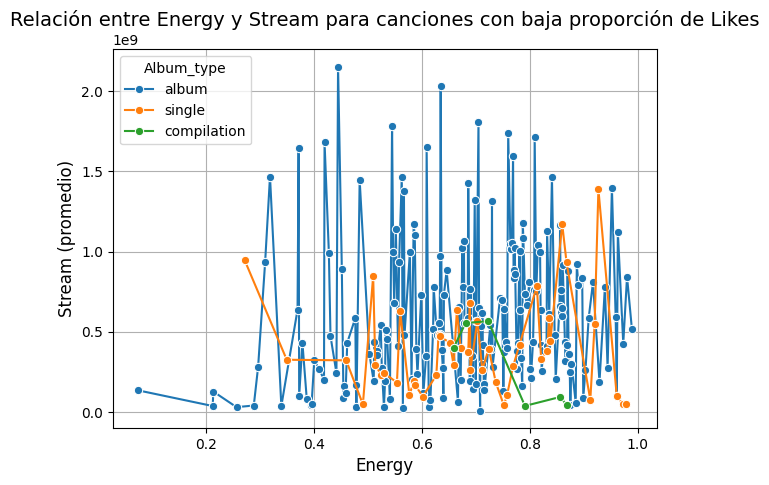

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos por Energy y Album_type, y calcular el promedio de Stream
grupo = low_likes.groupby(["Energy", "Album_type"])["Stream"].mean().reset_index()


# Personalización del gráfico

plt.title('Relación entre Energy y Stream para canciones con baja proporción de Likes', fontsize=14)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Stream (promedio)', fontsize=12)
plt.legend(title='Album Type')
plt.grid(True)
plt.tight_layout()
sns.lineplot(data=grupo, x='Energy', y='Stream', hue='Album_type', marker='o')


## Ejercicio 6: Exploración de Correlaciones

* Calcula la matriz de correlación para las columnas "Views", "Likes", "Comments", "Stream", "Energy", y "Danceability" en low_likes, para ello utiliza el método corr() de los dataframes.
* Genera un mapa de calor de esta matriz de correlación.
* Asegúrate de incluir una barra de colores, etiquetas de ejes, y un título descriptivo.

<Axes: title={'center': 'Promedio de Danceability por Tipo de Álbum (Likes_to_Views < 0.01)'}, ylabel='Album_type'>

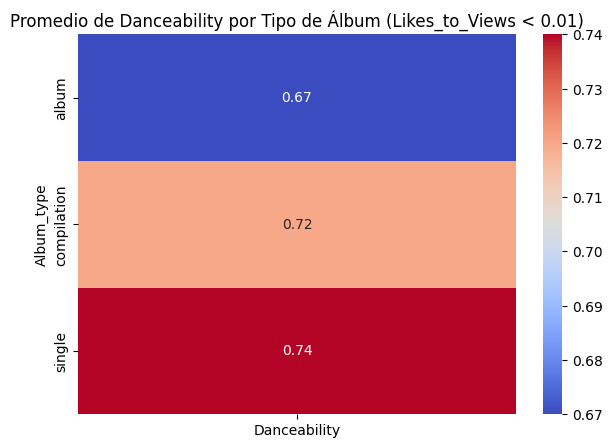

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y calcular el promedio de Danceability
heatmap_data = low_likes.groupby("Album_type")[["Danceability"]].mean().round(2)

# Personalización del gráfico
plt.title("Promedio de Danceability por Tipo de Álbum (Likes_to_Views < 0.01)")
plt.xlabel("Tipo de Álbum")
plt.ylabel("Danceability")
plt.tight_layout()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')

## Ejercicio 7: Análisis de Artistas

**Utiliza el dataFrame low_likes.**

* Identifica los tres artistas con el mayor total de "Stream" en este subconjunto.
* Presenta un dataFrame con el nombre del artista y el total correspondiente, ordenados de mayor a menor.
* Genera un gráfico de barras que compare estos totales entre los artistas identificados, en el eje X debe ir la variable stream y en el eje Y la variable Artist, para ello utiliza el método barplot() de la librería seaborn.

       Artist        Stream
0   Sam Smith  4.775585e+09
1  Katy Perry  4.655496e+09
2     Rihanna  4.641587e+09


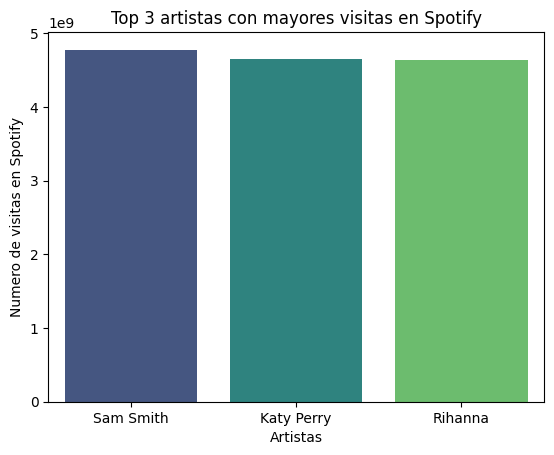

In [ ]:
top_artists = low_likes.groupby('Artist')['Stream'].sum().sort_values(ascending=False).reset_index().head(3)
# Personalización del gráfico
plt.title('Top 3 artistas con mayores visitas en Spotify')
plt.xlabel('Artistas')
plt.ylabel('Numero de visitas en Spotify')

# Crear un gráfico de barras para comparar los totales
sns.barplot(data=top_artists, x='Artist', y='Stream', palette='viridis')

# Mostrar los datos del análisis
print(top_artists)